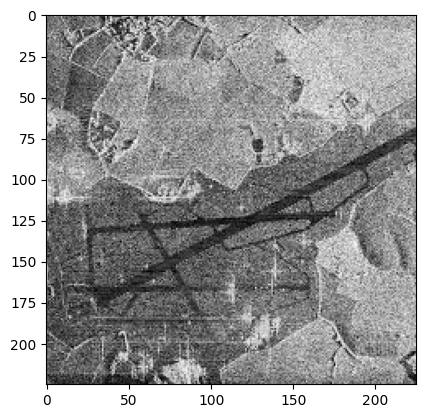

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

image = cv2.imread('sar_3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

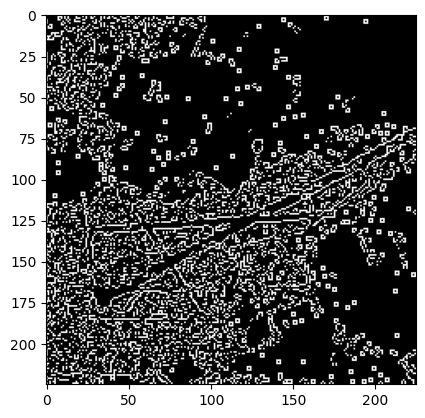

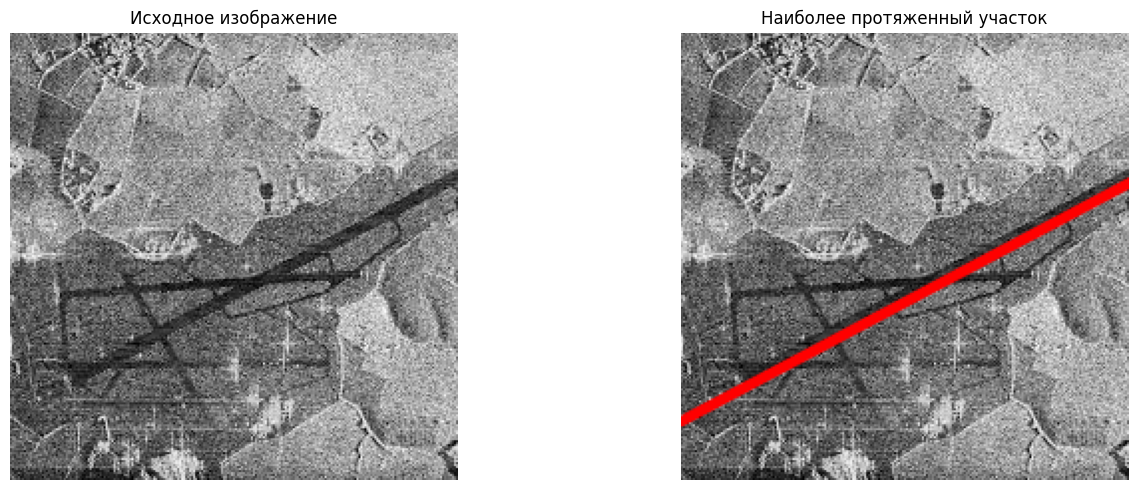

In [3]:
import math

#canny = cv2.Canny(image_gray, 50, 150, apertureSize=3)
bin_img = np.copy(image_gray)
threshold_value = 80
bin_img[image_gray < threshold_value] = 0
bin_img[image_gray >= threshold_value] = 255

canny = cv2.Canny(bin_img, 0, 250, apertureSize=3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, threshold=110)
plt.imshow(canny, cmap="gray")
#lines = cv2.HoughLines(canny, 1, np.pi / 180, 150)

image_with_lines = image.copy()
image_longest_only = image.copy()
max_length = 0
longest_line = None
if lines is not None:
    
    
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)
    
    if longest_line:
        
        cv2.line(image_with_lines, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
axes[1].set_title('Наиболее протяженный участок')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Метод                SSIM       MSE       
----------------------------------------
Фикс. порог          0.1736     15334.68  
Метод Оцу            0.3460     8263.68   
Адаптивная           0.3775     11209.77  


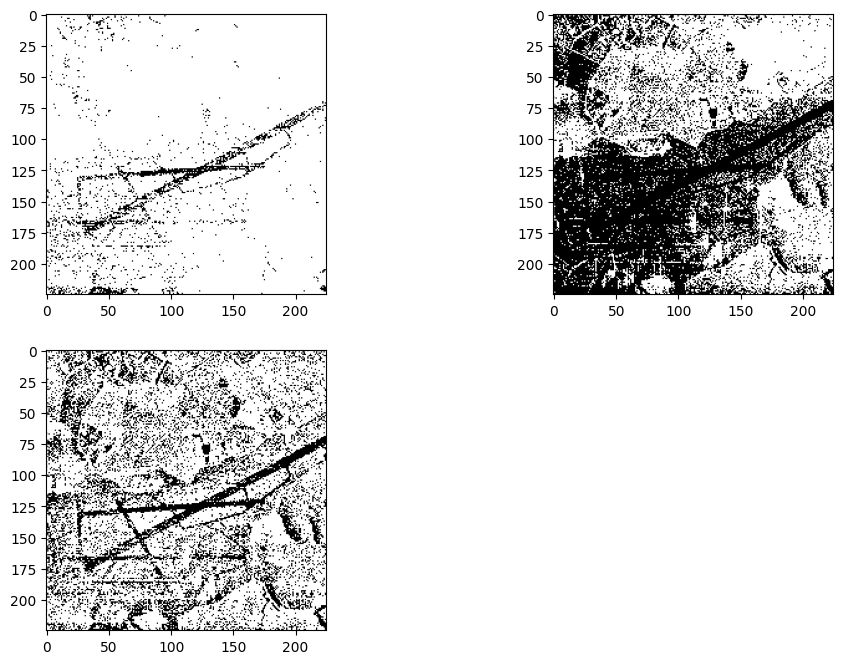

In [ ]:
from skimage.metrics import structural_similarity, mean_squared_error

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(bin_img, cmap="gray")

_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(2, 2, 2)
plt.imshow(th2, cmap="gray")

th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.subplot(2, 2, 3)
plt.imshow(th3, cmap="gray")

# Для точечной
ssim1 = structural_similarity(image_gray, bin_img, data_range=255)
mse1 = mean_squared_error(image_gray, bin_img)

# Для метода Оцу
ssim2 = structural_similarity(image_gray, th2, data_range=255)
mse2 = mean_squared_error(image_gray, th2)

# Для адаптивной бинаризации
ssim3 = structural_similarity(image_gray, th3, data_range=255)
mse3 = mean_squared_error(image_gray, th3)

print(f"{'Метод':<20} {'SSIM':<10} {'MSE':<10}")
print("-" * 40)
print(f"{'Точечная бинаризация':<20} {ssim1:<10.4f} {mse1:<10.2f}")
print(f"{'Метод Оцу':<20} {ssim2:<10.4f} {mse2:<10.2f}")
print(f"{'Адаптивная':<20} {ssim3:<10.4f} {mse3:<10.2f}")